<a href="https://colab.research.google.com/github/cbsebastian24/Trex/blob/main/Copy_of_plenary_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distributions with NFL Data


## Load the data

These data record play-by-play information for all games in the 2022 National Football League (NFL) season. These data were downloaded using the `nflverse` package for the R programming language (another statistics and data science environment), lightly edited, and saved in a tabular format for us to use in Python.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = "https://github.com/UM-Data-Science-101/lab-11/raw/refs/heads/main/NFL_play_by_play_2022.csv.gz"
nfl = pd.read_csv(file_path)

In [3]:
nfl.shape

(50147, 340)

There are many measurements for each play, some of which are computed values from `nflverse`. Here's a brief list using a data dictionary.

In [4]:
nfl_data_dictionary = pd.read_csv("https://github.com/UM-Data-Science-101/lab-11/raw/refs/heads/main/NFL_play_by_play_data_dictonary.csv", index_col = "Field")
nfl_data_dictionary.loc[["play_id", "game_id", "home_team", "away_team", "posteam",
                         "defteam", "yardline_100", "down", "ydstogo",
                        "touchdown", "play_type"]]

,Description,Type
Field,,
play_id,Numeric play id that when used with game_id an...,numeric
game_id,Ten digit identifier for NFL game.,character
home_team,String abbreviation for the home team.,character
away_team,String abbreviation for the away team.,character
posteam,String abbreviation for the team with possession.,character
defteam,String abbreviation for the team on defense.,character
yardline_100,Numeric distance in the number of yards from t...,numeric
down,The down for the given play.,numeric
ydstogo,Numeric yards in distance from either the firs...,numeric


Use the data dictionary to look up the `game_seconds_remaining` column's definition.

In [6]:
nfl_data_dictionary.loc[["game_seconds_remaining"]]

,Description,Type
Field,,
game_seconds_remaining,Numeric seconds remaining in the game.,numeric


<details>

````
nfl_data_dictionary.loc[["game_seconds_remaining"]]
````
</details>

## Value Counts

The `value_counts()` method is used to compute the frequency of unique values in a Series. It returns a new Series where the index represents the unique values from the original Series, and the values represent their respective counts. This method is typically used on categorical variables (Why do you think that is?)

In the example below, we can see the distribution of the `play_type` variable. Specifically, we're seeing the number of plays in the dataset that were passes, runs, etc.

In [8]:
nfl["play_type"].value_counts()

,count
play_type,
pass,20393
run,15037
no_play,4563
kickoff,2835
punt,2294
extra_point,1253
field_goal,1105
qb_kneel,442
qb_spike,63


Calculate the proportion of plays that resulted in touchdowns. (Hint: You can use the `normalize=True` flag with the `value_counts()` method to get proportions instead of counts).

In [12]:
nfl["touchdown"].value_counts(normalize=True)

,proportion
touchdown,
0.0,0.971006
1.0,0.028994


<details>

````
nfl["touchdown"].value_counts(normalize=True)
````

</details>

## Grouping

Sometimes, we want to ask questions not just across the entire dataset, but within groups. Dataframes allow us to ask questions like this using the `groupby()` method. Sometimes, you will hear this referred to as a `split-apply-combine` method, where we

1) Split our data by some grouping
2) Apply a function or aggregation to each group
3) Combine the results into a full dataframe

Let's consider an example:

On which down do the most touchdowns occur?


In [13]:
nfl.groupby("down")["touchdown"].mean()

,touchdown
down,
1.0,0.029445
2.0,0.036555
3.0,0.045266
4.0,0.016546


Let's break this down:

1) We **split** our data by downs.
2) We **applied** the `mean()` function to the `touchdown` variable for each down.
3) Python **combined** the mean results for each down into a single, new dataframe. This dataframe is indexed by down.


For each down, how many yards are remaining on average from the next first down marker?

In [14]:
nfl.groupby("down")["ydstogo"].mean()

,ydstogo
down,
1.0,9.968059
2.0,7.751128
3.0,6.878553
4.0,7.535689


<details>

````
nfl.groupby("down")["ydstogo"].mean()
````

</details>

## Visualizing Relationships

We can visualize the relationship between two variables in a dataset through plotting. A multiple boxplot is useful when visualizing the distribution of a **quantitative variable given a categorical variable**.

Create a box plot of the `down` and `yrdstogo`. What does this plot tell you?

<Axes: xlabel='down', ylabel='ydstogo'>

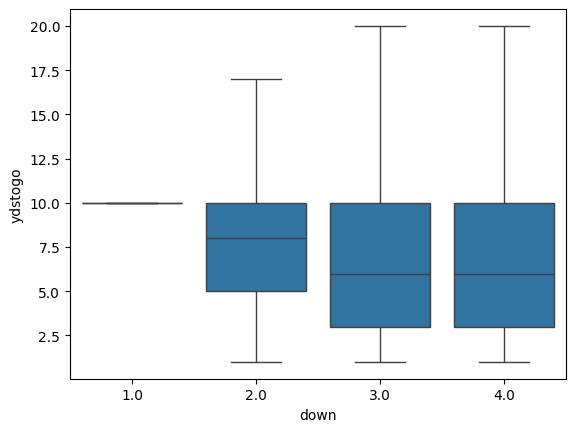

In [15]:
sb.boxplot(data=nfl, x="down", y="ydstogo", showfliers=False)

<details>

````
sb.boxplot(data=nfl, x="down", y="ydstogo", showfliers=False)
````

</details>

The boxplot basically shows that the median yards to go our less at later downs which also makes sense.